Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
print(tf.__version__)

2.15.0


In [54]:
np.random.seed(101)

In [55]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(n=3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [56]:
hoursstudy_model = tf.keras.Sequential([
    layers.Normalization(input_shape=[1,], axis=None),
    layers.Dense(units=1)
])

hoursstudy_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [57]:
hoursstudy_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error')

In [58]:
%%time
history = hoursstudy_model.fit(
    x=df['Hours'],
    y=df['Scores'],
    epochs=200,
    batch_size=5,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 7 s, sys: 257 ms, total: 7.26 s
Wall time: 7.33 s


In [59]:
test_results = {}
test_results['hoursstudy_model'] = hoursstudy_model.evaluate(
    x=df['Hours'],
    y=df['Scores'], verbose=0)
print(test_results)

{'hoursstudy_model': 5.094668388366699}


In [60]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

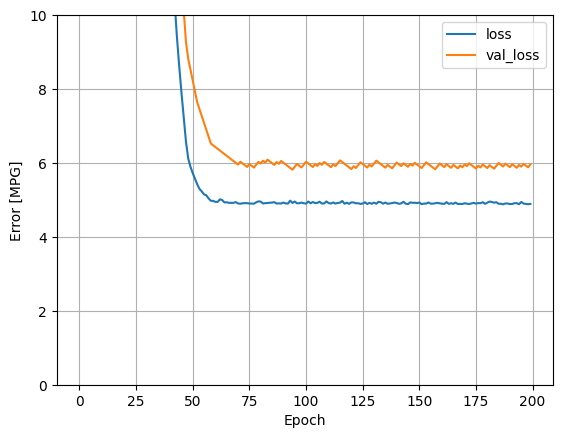

In [61]:
plot_loss(history)
plt.show()